<a href="https://colab.research.google.com/github/AKO91/Adult-Income-Analysis/blob/main/Project_4_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and initial inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/adult.csv'
df = pd.read_csv(fpath)
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [198]:
# Creating a loop to print the details of numerical columns in the dataset
for col in df:
  des = df[col].describe()
  if df[col].dtype in [float, int]:
    print(f'Details of {col} column:')
    print(des)
    print('\n')

Details of age column:
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


Details of fnlwgt column:
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


Details of educational-num column:
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64


Details of capital-gain column:
count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


Details of capital-loss column:
count    488

*Checking inconsistencies in categorical columns*

In [199]:
# Creating a loop to print the details of categorical columns in the dataset
for col in df:
  des_cat = df[col].value_counts()
  if df[col].dtype == object:
    print(f'Details of {col} column:')
    print(des_cat)
    print('\n')

Details of workclass column:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Details of education column:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


Details of marital-status column:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, d

*Values labeled as '?' will be replaced with 'Unknown.'*

In [200]:
df.replace('?','Unknown', inplace=True)


## Preprocessing the Data

In [201]:
X = df.drop('income', axis=1)
y = df['income']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
X.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Unknown  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4            Unknown    Own-child  White  Female             0             0   

   hours-per-week native-country  
0              40  United-States  
1              50  United-States  
2              40  United-States  
3              40  United-States  
4              30  United-States

In [55]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [205]:
num_cols = X.select_dtypes('number').columns
cat_cols = X.select_dtypes('object').columns

In [206]:
scaler = StandardScaler()
impute_num = SimpleImputer(strategy='median')
impute_cat = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_pipe = make_pipeline(impute_cat, ohe, scaler)
num_pipe = make_pipeline(impute_num, scaler)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
num_tuple = ('numeric', num_pipe, num_cols)
preprocesser = ColumnTransformer([ohe_tuple, num_tuple])

## Default - Model 1

In [207]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocesser, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27801
        >50K       1.00      1.00      1.00      8830

    accuracy                           1.00     36631
   macro avg       1.00      1.00      1.00     36631
weighted avg       1.00      1.00      1.00     36631




----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.73      0.63      0.68      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.78      0.79     12211
weighted avg       0.85      0.86      0.86     12211



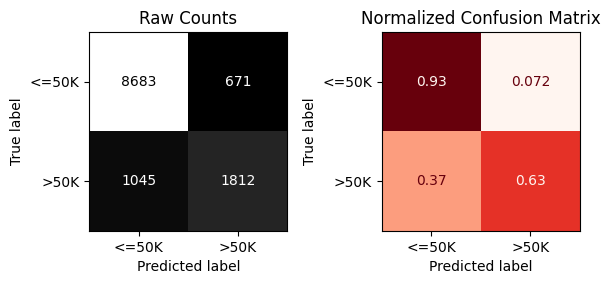

In [208]:
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test);

## Clustering - Model 2

In [209]:
#Additional imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [210]:
df2 = df.copy()

In [211]:
X_pro = preprocesser.fit_transform(df2)

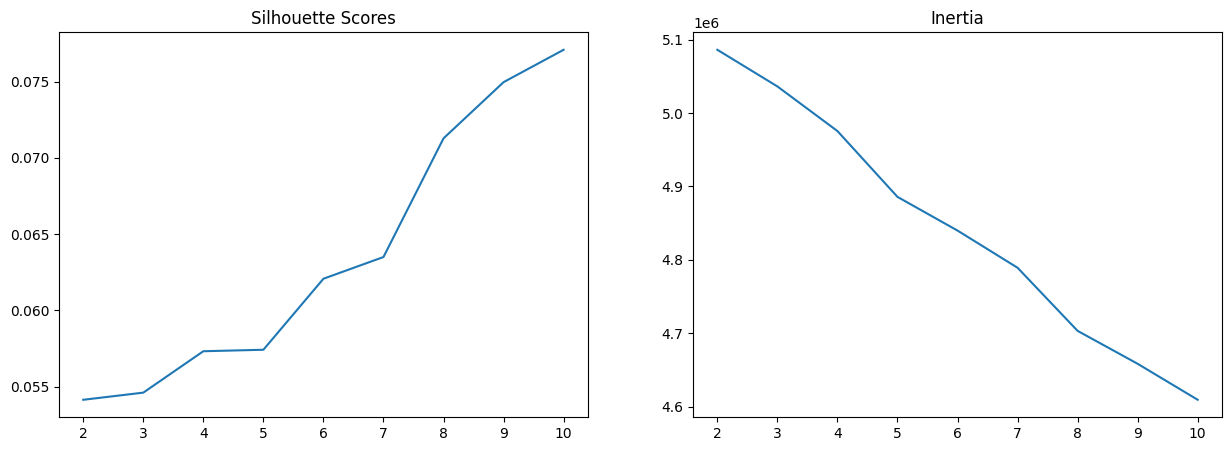

In [212]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_pro)
  sils.append(silhouette_score(X_pro, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

*8 clusters were selected*

In [213]:
kmeans = KMeans(n_clusters=8, n_init= 'auto', random_state=42)
kmeans.fit(X_pro)

df['cluster'] = kmeans.labels_
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Unknown  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4            Unknown    Own-child  White  Female             0             0   

   hours-per-week native-country income  cluster  
0              40  United-States  <=50K        3  
1              50  United-States  <=50K        1  
2              40  United-States   >50K        1  
3              40  United-States   >50K        1  
4              30  United-States  <=50K        5

In [214]:
numeric_df = df.select_dtypes(include=['number'])
numeric_cluster_groups = numeric_df.groupby('cluster', as_index=False).mean()
numeric_cluster_groups

cluster        age         fnlwgt  educational-num  capital-gain  \
0        0  43.593278  185886.236161         9.831506    868.652049   
1        1  43.117911  187915.856002        10.145262   1780.250532   
2        2  42.516335  183856.491477        10.852983    909.109375   
3        3  27.745945  197482.763934         9.892215    341.065320   
4        4  38.967655  182152.938005        11.077089    694.714825   
5        5  39.945265  187636.653223         9.202017    455.722002   
6        6  47.533784  184157.216216        16.000000   5747.119932   
7        7  38.095652  167183.269565        10.765217   1678.208696   

   capital-loss  hours-per-week  
0     75.209741       39.685388  
1    121.358157       44.692812  
2    104.037642       41.419744  
3     52.820407       37.162563  
4     69.394609       38.610243  
5     64.879006       31.843356  
6    232.398649       46.505068  
7    134.269565       42.852174

In [215]:
X2 = df.drop('income', axis=1)
y2 = df['income']

In [216]:
X2.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Unknown  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4            Unknown    Own-child  White  Female             0             0   

   hours-per-week native-country  cluster  
0              40  United-States        3  
1              50  United-States        1  
2              40  United-States        1  
3              40  United-States        1  
4              30  United-States        5

In [217]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [218]:
num_cols = X2.select_dtypes('number').columns
cat_cols = X2.select_dtypes('object').columns
scaler = StandardScaler()
impute_num = SimpleImputer(strategy='median')
impute_cat = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_pipe = make_pipeline(impute_cat, ohe, scaler)
num_pipe = make_pipeline(impute_num, scaler)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
num_tuple = ('numeric', num_pipe, num_cols)
preprocesser = ColumnTransformer([ohe_tuple, num_tuple])

In [219]:
rf2 = RandomForestClassifier()
rf2_pipe = make_pipeline(preprocesser, rf2)
rf2_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'cluster'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27801
        >50K       1.00      1.00      1.00      8830

    accuracy                           1.00     36631
   macro avg       1.00      1.00      1.00     36631
weighted avg       1.00      1.00      1.00     36631



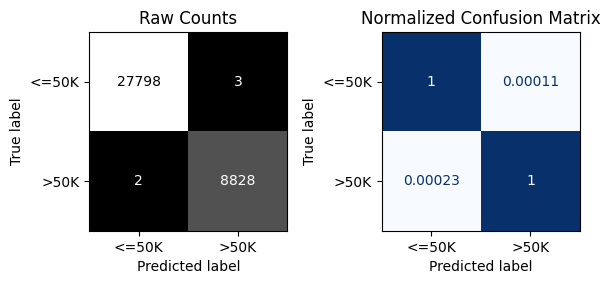


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.73      0.63      0.68      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.78      0.79     12211
weighted avg       0.85      0.86      0.85     12211



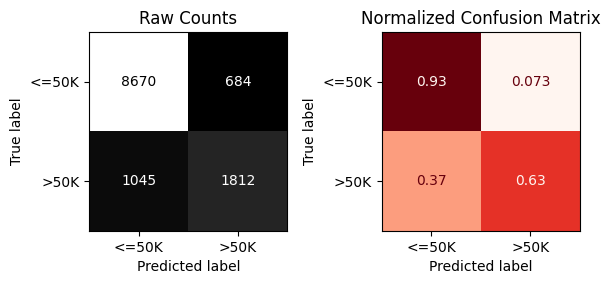

In [220]:
evaluate_classification(rf2_pipe, X2_train, y2_train, X2_test, y2_test);

*The model remains overfit and adding clusters to the data did not help the model perform better on the test data.*

## Feature Selection - Model 3


*A filter method based on reducing highly correlated features will be used next to apply before fitting the prediction model.*

In [41]:
df3 = df.copy()

In [5]:
df3.replace('?', np.nan, inplace=True)

In [42]:
X3 = df3.drop('income', axis=1)
y3 = df3['income']

In [43]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [44]:
num_cols = X3.select_dtypes('number').columns
cat_cols = X3.select_dtypes('object').columns

In [45]:
scaler = StandardScaler()
impute_num = SimpleImputer(strategy='median')
impute_cat = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_pipe = make_pipeline(impute_cat, ohe, scaler)
num_pipe = make_pipeline(impute_num, scaler)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
num_tuple = ('numeric', num_pipe, num_cols)
preprocesser = ColumnTransformer([ohe_tuple, num_tuple])

In [47]:
X3_train_processed = preprocesser.fit_transform(X3_train)
X3_test_processed = preprocesser.transform(X3_test)

In [11]:
X3_train_processed.shape

(36631, 105)

In [12]:
X3_test_processed.shape

(12211, 105)

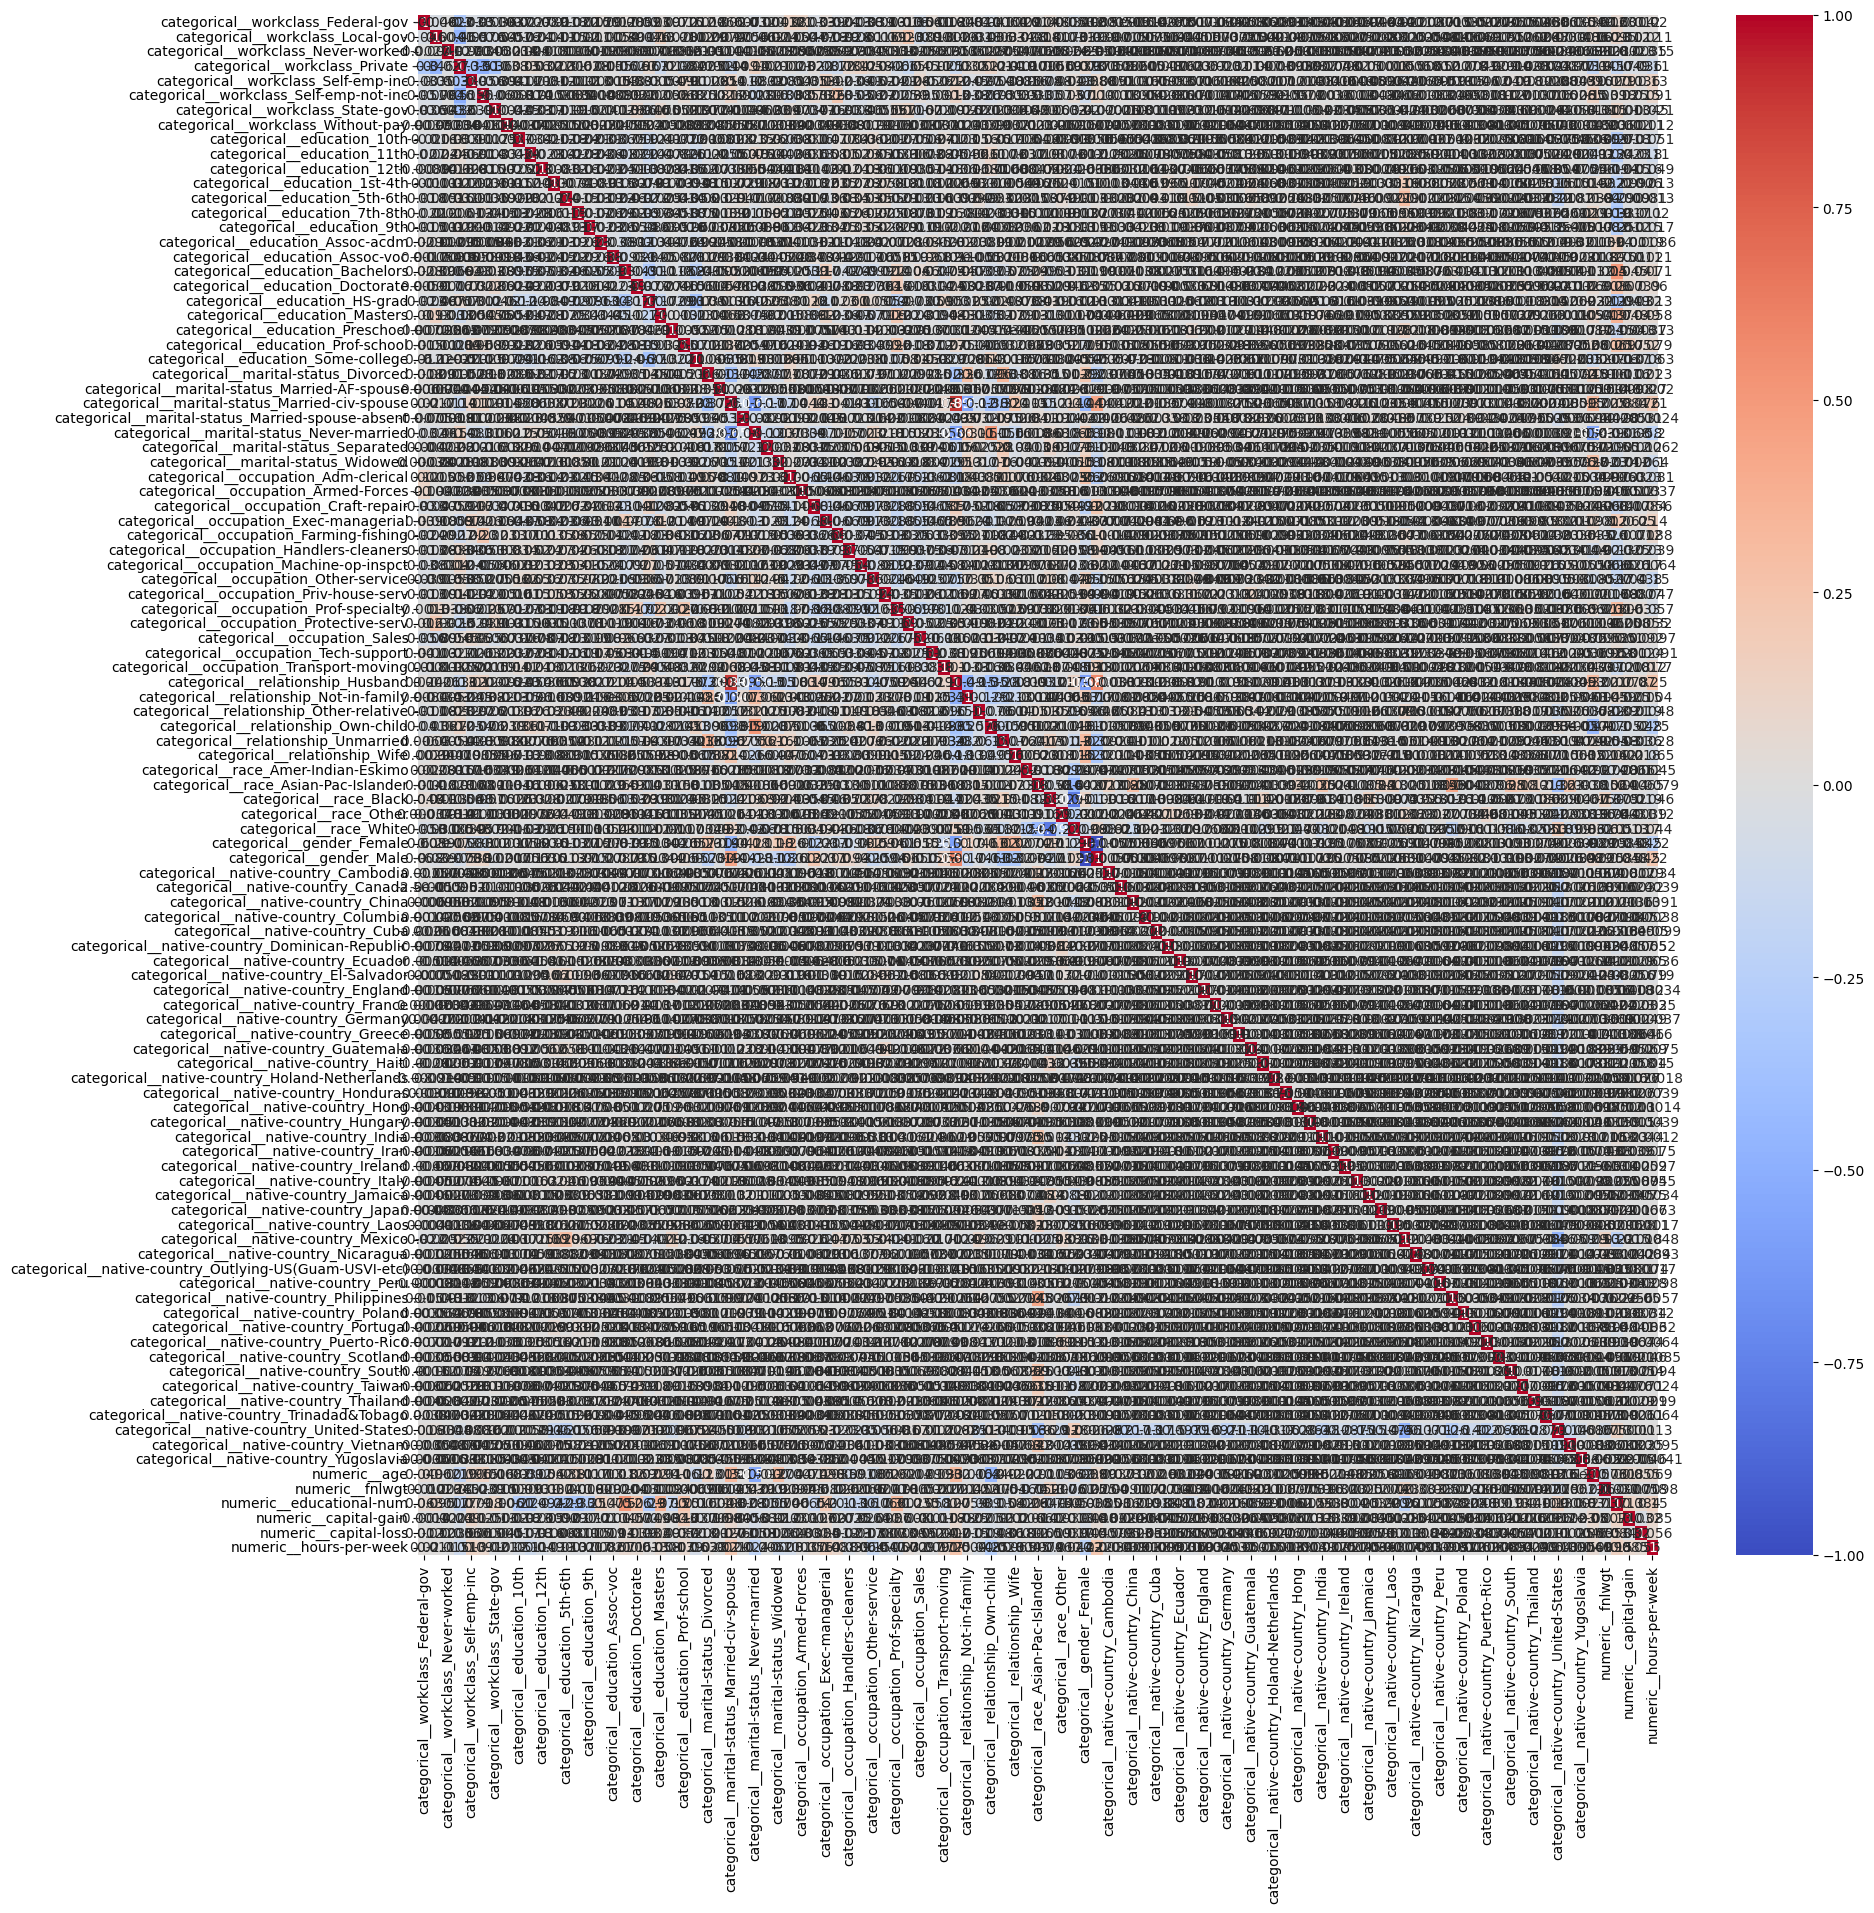

In [14]:
# Creating a heatmap for correlation between features

corr = X3_train_processed.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm', annot = True);

*The heatmap shows that there is no high correlation between any numerical features. Then a collinearity filter will be used to reduce processed features.*




In [16]:
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4442 sha256=8a9205cdb479e96e6fe3e960480b3f49623525399337cb286f9ff41746436025
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [48]:
selector = SelectNonCollinear(correlation_threshold = 0.5, scoring = f_classif)

In [49]:
selector.fit(X3_train_processed.values, y3_train.values)

In [50]:
non_collinear = selector.get_support()
non_collinear.count(True)

101

In [51]:
non_collinear_series = pd.Series(selector.get_support(), index=X3_train_processed.columns)
non_collinear_series

categorical__workclass_?               False
categorical__workclass_Federal-gov      True
categorical__workclass_Local-gov        True
categorical__workclass_Never-worked     True
categorical__workclass_Private          True
                                       ...  
numeric__fnlwgt                         True
numeric__educational-num                True
numeric__capital-gain                   True
numeric__capital-loss                   True
numeric__hours-per-week                 True
Length: 108, dtype: bool

In [52]:
training_data_to_keep = X3_train_processed.values[:, non_collinear]
columns = np.array(X3_train_processed.columns)[non_collinear]
X_train_no_corr = pd.DataFrame(training_data_to_keep, columns = columns)

test_data_to_keep = X3_test_processed.values[:, non_collinear]
X_test_no_corr = pd.DataFrame(test_data_to_keep, columns = columns)

In [35]:
rf3 = RandomForestClassifier()

In [53]:
rf3.fit(X_train_no_corr, y3_train)

RandomForestClassifier()

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27801
        >50K       1.00      1.00      1.00      8830

    accuracy                           1.00     36631
   macro avg       1.00      1.00      1.00     36631
weighted avg       1.00      1.00      1.00     36631



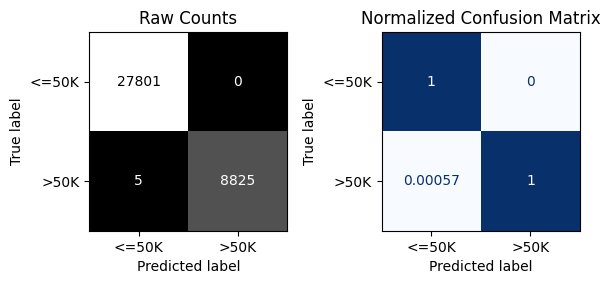


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.74      0.63      0.68      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.78      0.80     12211
weighted avg       0.86      0.86      0.86     12211



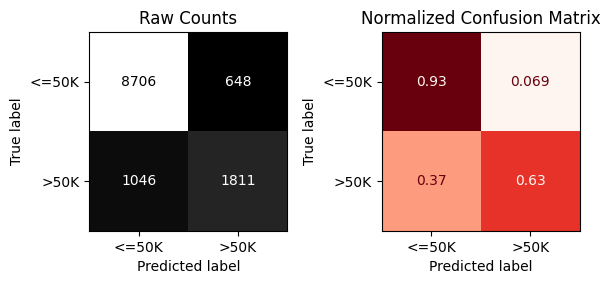

In [56]:
evaluate_classification(rf3, X_train_no_corr, y3_train, X_test_no_corr, y3_test)


*Using the colinearity filter method did not help reduce overfitting, and led to the model performing similarly.*

## Importances

In [63]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

### Importances for default model

In [59]:
from sklearn.inspection import permutation_importance

In [29]:
r = permutation_importance(rf_pipe, X_test, y_test, n_repeats =5, random_state=42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

capital-gain       0.039587
marital-status     0.018377
age                0.010106
occupation         0.010073
capital-loss       0.008468
relationship       0.004701
hours-per-week     0.003816
educational-num    0.001949
workclass          0.000622
race               0.000442
fnlwgt            -0.000606
native-country    -0.001376
gender            -0.002522
education         -0.006027
Name: permutation importance, dtype: float64

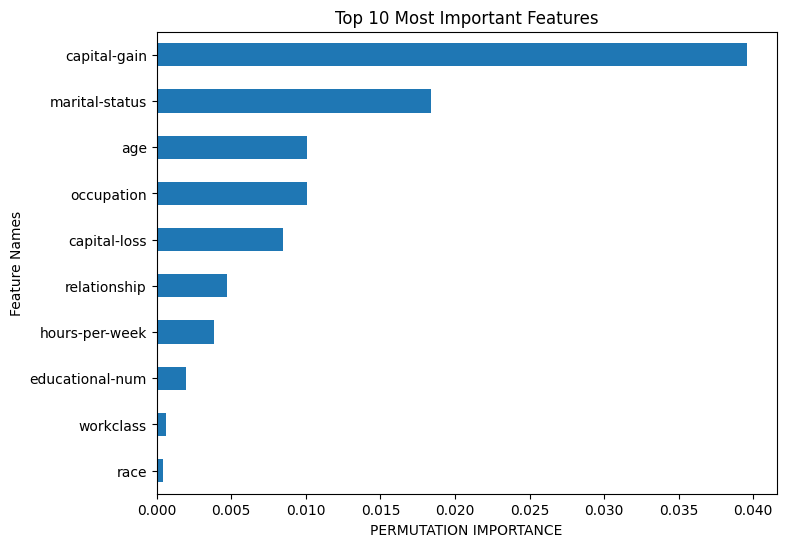

In [ ]:
ax = plot_importance_color(permutation_importances,color_dict=None,top_n=10);
ax.set_xlabel("PERMUTATION IMPORTANCE");

### Importances for model with clustering

In [28]:
r2 = permutation_importance(rf2_pipe, X2_test, y2_test, n_repeats =5, random_state=42)
r2.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [31]:
permutation_importances2 = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances2 = permutation_importances2.sort_values(ascending=False)
permutation_importances2

capital-gain       0.039604
marital-status     0.020539
occupation         0.012825
age                0.012317
capital-loss       0.007714
relationship       0.005847
educational-num    0.005208
hours-per-week     0.004111
workclass          0.002211
race               0.001458
fnlwgt             0.000966
gender             0.000098
native-country    -0.000950
education         -0.003620
Name: permutation importance, dtype: float64

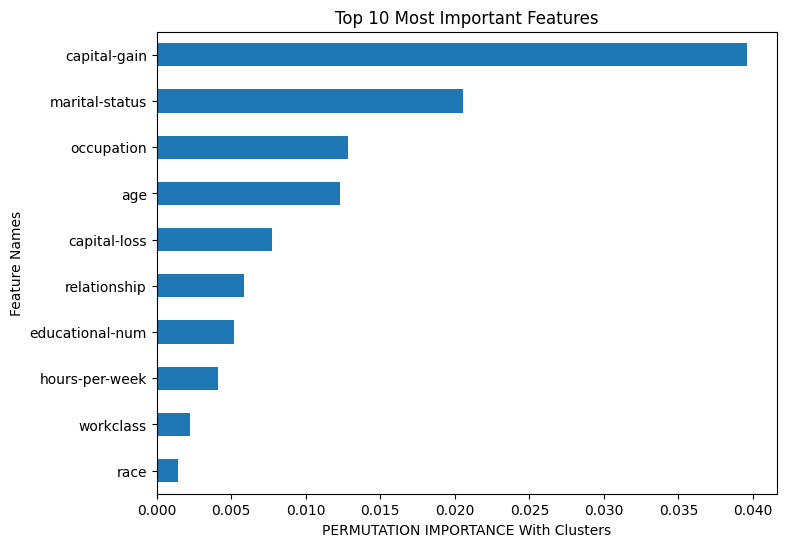

In [32]:
ax = plot_importance_color(permutation_importances2,color_dict=None,top_n=10);
ax.set_xlabel("PERMUTATION IMPORTANCE With Clusters");

### Importances with feature selection

In [60]:
r3 = permutation_importance(rf3, X_test_no_corr, y3_test, n_repeats =5, random_state=42)
r3.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [61]:
permutation_importances3 = pd.Series(r3['importances_mean'],index=X_test_no_corr.columns,
                           name = 'permutation importance')
permutation_importances3 = permutation_importances3.sort_values(ascending=False)
permutation_importances3

numeric__capital-gain                             0.041897
categorical__marital-status_Married-civ-spouse    0.030726
numeric__age                                      0.014020
numeric__educational-num                          0.010908
numeric__capital-loss                             0.008451
                                                    ...   
categorical__occupation_Adm-clerical             -0.001310
categorical__workclass_Local-gov                 -0.001376
categorical__education_HS-grad                   -0.002490
categorical__workclass_Private                   -0.002604
categorical__education_Some-college              -0.002621
Name: permutation importance, Length: 101, dtype: float64

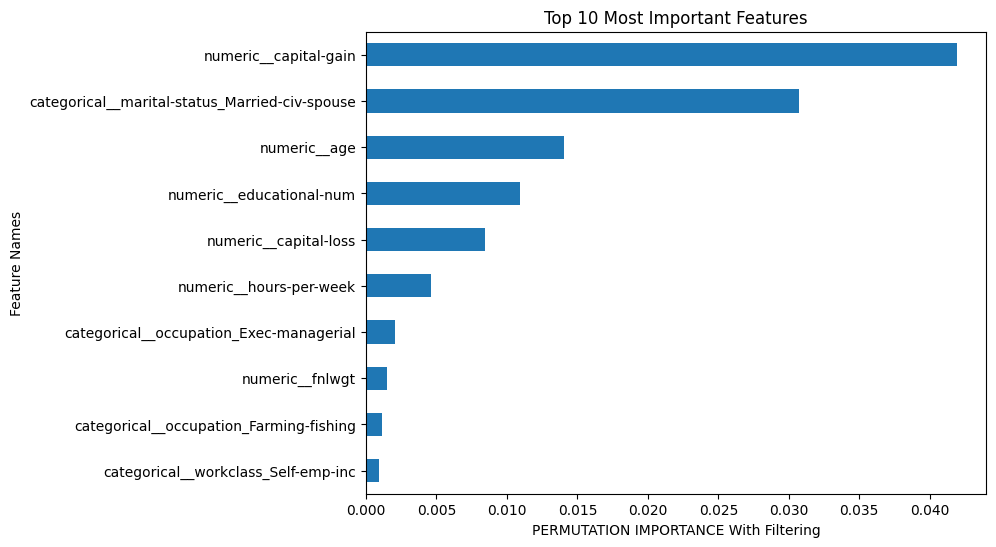

In [64]:
ax = plot_importance_color(permutation_importances3,color_dict=None,top_n=10);
ax.set_xlabel("PERMUTATION IMPORTANCE With Filtering");

* The top 10 feature importances for each model have changed slightly.

* Capital gain and marital status remain the two most important features for model predictions.

* Other importances including education, capital loss, and age are also high for all models but have different ranking in terms of importance.